Last annotation:
Image path: ..\data\images\synthetic_buildings\drone6.png
Mask (XYXY): [96, 82, 704, 159]


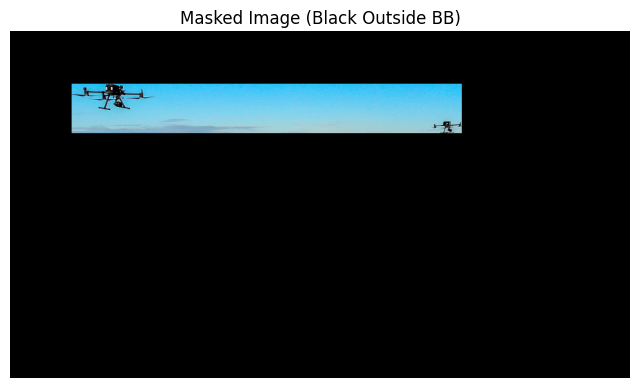

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================================
# DO NOT EDIT ABOVE
# ==========================================================

def show_last_mask(bboxes, base_image_dir="..\\data\\images"):
    if not bboxes:
        raise ValueError("No bounding boxes defined.")

    # Take last entry
    image_rel_path, x1, y1, x2, y2 = bboxes[-1]
    image_path = os.path.join(base_image_dir, image_rel_path)

    print("Last annotation:")
    print(f"Image path: {image_path}")
    print(f"Mask (XYXY): [{x1}, {y1}, {x2}, {y2}]")

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Failed to load image")

    h, w = img.shape[:2]

    # Clamp box to image size
    x1 = max(0, min(x1, w - 1))
    x2 = max(0, min(x2, w))
    y1 = max(0, min(y1, h - 1))
    y2 = max(0, min(y2, h))

    # Create binary mask
    mask = np.zeros((h, w), dtype=np.uint8)
    mask[y1:y2, x1:x2] = 1

    # Create black image
    masked_img = np.zeros_like(img)

    # Copy original pixels ONLY inside mask
    masked_img[mask == 1] = img[mask == 1]

    # Convert to RGB for matplotlib
    masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

    # Show
    plt.figure(figsize=(8, 5))
    plt.imshow(masked_img)
    plt.title("Masked Image (Black Outside BB)")
    plt.axis("off")
    plt.show()

    return mask


# ==========================================================
# MANUAL MASK LIST (EDIT ONLY THIS PART)
# ==========================================================

bboxes = [
    ("clear_sky\\drone1s.png", 152, 50, 525, 248),
    ("clear_sky\\drone2s.png", 1383, 350, 2415, 1070),
    ("clear_sky\\drone3s.png", 643, 295, 912, 364),
    ("clear_sky\\drone4s.png", 296, 180, 325, 200),
    ("clear_sky\\drone5s.png", 153, 89, 172, 105),
    ("real_buildings\\image1.png", 266, 360, 346, 395),
    ("real_buildings\\image2.png", 201, 195, 223, 204),
    ("real_buildings\\image3.png", 10, 5, 46, 20),
    ("real_buildings\\image4.png", 800, 300, 825, 325),
    ("real_buildings\\image5.png", 612, 216, 583, 257),    
    ("real_buildings\\image6.png", 538, 405, 571, 422),
    ("synthetic_buildings\\drone1.png", 276, 120, 344, 167),
    ("synthetic_buildings\\drone2.png", 252, 44, 369, 102),
    ("synthetic_buildings\\drone3.png", 259, 75, 450, 241),
    ("synthetic_buildings\\drone4.png", 402, 177, 573, 219),
    ("synthetic_buildings\\drone5.png", 656, 351, 731, 412),
    ("synthetic_buildings\\drone6.png", 96, 82, 704, 159),



    # add more below ↓
]

mask = show_last_mask(bboxes)

In [33]:
import cv2
import numpy as np
import os

# ==========================================================
# CONFIG
# ==========================================================

BASE_IMAGE_DIR = "../data/images"
OUTPUT_DIR = r"C:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\experiments\bb_on_drones_exp\output"

MASKED_DIR = os.path.join(OUTPUT_DIR, "masked_images")
CROPPED_DIR = os.path.join(OUTPUT_DIR, "cropped_masks")

os.makedirs(MASKED_DIR, exist_ok=True)
os.makedirs(CROPPED_DIR, exist_ok=True)

# ==========================================================
# BOUNDING BOX LIST
# ==========================================================

bboxes = [
    ("clear_sky\\drone1s.png", 152, 50, 525, 248),
    ("clear_sky\\drone2s.png", 1383, 350, 2415, 1070),
    ("clear_sky\\drone3s.png", 643, 295, 912, 364),
    ("clear_sky\\drone4s.png", 296, 180, 325, 200),
    ("clear_sky\\drone5s.png", 153, 89, 172, 105),
    ("real_buildings\\image1.png", 266, 360, 346, 395),
    ("real_buildings\\image2.png", 201, 195, 223, 204),
    ("real_buildings\\image3.png", 10, 5, 46, 20),
    ("real_buildings\\image4.png", 800, 300, 825, 325),
    ("real_buildings\\image5.png", 612, 216, 583, 257),    
    ("real_buildings\\image6.png", 538, 405, 571, 422),
    ("synthetic_buildings\\drone1.png", 276, 120, 344, 167),
    ("synthetic_buildings\\drone2.png", 252, 44, 369, 102),
    ("synthetic_buildings\\drone3.png", 259, 75, 450, 241),
    ("synthetic_buildings\\drone4.png", 402, 177, 573, 219),
    ("synthetic_buildings\\drone5.png", 656, 351, 731, 412),
    ("synthetic_buildings\\drone6.png", 96, 82, 704, 159),



    # add more below ↓
]

# ==========================================================
# PROCESS
# ==========================================================

for rel_path, x1, y1, x2, y2 in bboxes:
    img_path = os.path.join(BASE_IMAGE_DIR, rel_path)

    if not os.path.exists(img_path):
        print(f"❌ Image not found: {img_path}")
        continue

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Fix possible inverted coordinates
    x1, x2 = sorted([max(0, x1), min(w, x2)])
    y1, y2 = sorted([max(0, y1), min(h, y2)])

    # -------- MASKED IMAGE (same size) --------
    mask = np.zeros((h, w), dtype=np.uint8)
    mask[y1:y2, x1:x2] = 1

    masked_img = np.zeros_like(img)
    masked_img[mask == 1] = img[mask == 1]

    base_name = os.path.basename(rel_path)
    masked_out_path = os.path.join(MASKED_DIR, base_name)
    cv2.imwrite(masked_out_path, masked_img)

    # -------- CROPPED MASKED IMAGE --------
    cropped_img = masked_img[y1:y2, x1:x2]
    cropped_out_path = os.path.join(CROPPED_DIR, base_name)
    cv2.imwrite(cropped_out_path, cropped_img)

    print(f"✅ Processed: {rel_path}")

print("\n🎉 Done! All masked and cropped images saved.")


✅ Processed: clear_sky\drone1s.png
✅ Processed: clear_sky\drone2s.png
✅ Processed: clear_sky\drone3s.png
✅ Processed: clear_sky\drone4s.png
✅ Processed: clear_sky\drone5s.png
✅ Processed: real_buildings\image1.png
✅ Processed: real_buildings\image2.png
✅ Processed: real_buildings\image3.png
✅ Processed: real_buildings\image4.png
✅ Processed: real_buildings\image5.png
✅ Processed: real_buildings\image6.png
✅ Processed: synthetic_buildings\drone1.png
✅ Processed: synthetic_buildings\drone2.png
✅ Processed: synthetic_buildings\drone3.png
✅ Processed: synthetic_buildings\drone4.png
✅ Processed: synthetic_buildings\drone5.png
✅ Processed: synthetic_buildings\drone6.png

🎉 Done! All masked and cropped images saved.


In [37]:
import os
import torch
import cv2
import numpy as np
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
from tqdm import tqdm

# ==========================================================
# CONFIG
# ==========================================================

device = "cuda" if torch.cuda.is_available() else "cpu"

BASE_IMAGES_DIR = "../data/images"

MASKED_DIR = r"C:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\experiments\bb_on_drones_exp\output\masked_images"
CROPPED_DIR = r"C:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\experiments\bb_on_drones_exp\output\cropped_masks"

OUTPUT_DEPTH_DIR = r"C:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\experiments\bb_on_drones_exp\output\depth_anything"
os.makedirs(OUTPUT_DEPTH_DIR, exist_ok=True)

# ==========================================================
# LOAD DEPTH ANYTHING V2
# ==========================================================

print("Loading models... This may take a moment.")

da_checkpoint = "depth-anything/Depth-Anything-V2-Small-hf"
da_processor = AutoImageProcessor.from_pretrained(da_checkpoint)
da_model = AutoModelForDepthEstimation.from_pretrained(da_checkpoint).to(device)
da_model.eval()

print("✅ Depth Anything V2 loaded.")

# ==========================================================
# DEPTH FUNCTION (WITH COLOR MAP)
# ==========================================================

def run_depth_anything(image_path, out_name):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Failed to load {image_path}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    inputs = da_processor(images=img_rgb, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = da_model(**inputs)
        depth = outputs.predicted_depth[0].cpu().numpy()

    # Normalize depth
    depth_norm = (depth - depth.min()) / (depth.max() - depth.min() + 1e-8)
    depth_uint8 = (depth_norm * 255).astype(np.uint8)

    # Apply Depth Anything official-style colormap
    depth_color = cv2.applyColorMap(depth_uint8, cv2.COLORMAP_INFERNO)

    out_path = os.path.join(OUTPUT_DEPTH_DIR, out_name)
    cv2.imwrite(out_path, depth_color)

# ==========================================================
# 1. ORIGINAL IMAGES
# ==========================================================

print("\n🚀 Processing ORIGINAL images...")

for root, _, files in os.walk(BASE_IMAGES_DIR):
    for f in files:
        if not f.lower().endswith((".png", ".jpg", ".jpeg")):
            continue

        img_path = os.path.join(root, f)
        name, _ = os.path.splitext(f)

        out_name = f"{name}_DA.png"
        run_depth_anything(img_path, out_name)

# ==========================================================
# 2. MASKED IMAGES
# ==========================================================

print("\n🚀 Processing MASKED images...")

for f in tqdm(os.listdir(MASKED_DIR)):
    if not f.lower().endswith((".png", ".jpg", ".jpeg")):
        continue

    img_path = os.path.join(MASKED_DIR, f)
    name, _ = os.path.splitext(f)

    out_name = f"{name}_masked_DA.png"
    run_depth_anything(img_path, out_name)

# ==========================================================
# 3. CROPPED IMAGES
# ==========================================================

print("\n🚀 Processing CROPPED images...")

for f in tqdm(os.listdir(CROPPED_DIR)):
    if not f.lower().endswith((".png", ".jpg", ".jpeg")):
        continue

    img_path = os.path.join(CROPPED_DIR, f)
    name, _ = os.path.splitext(f)

    out_name = f"{name}_cropped_DA.png"
    run_depth_anything(img_path, out_name)

print("\n🎉 DONE — all Depth Anything maps saved with colors.")


Loading models... This may take a moment.
✅ Depth Anything V2 loaded.

🚀 Processing ORIGINAL images...

🚀 Processing MASKED images...


100%|██████████| 17/17 [00:21<00:00,  1.24s/it]



🚀 Processing CROPPED images...


100%|██████████| 17/17 [00:09<00:00,  1.81it/s]


🎉 DONE — all Depth Anything maps saved with colors.


Showing strip for: clear_sky\drone1s.png


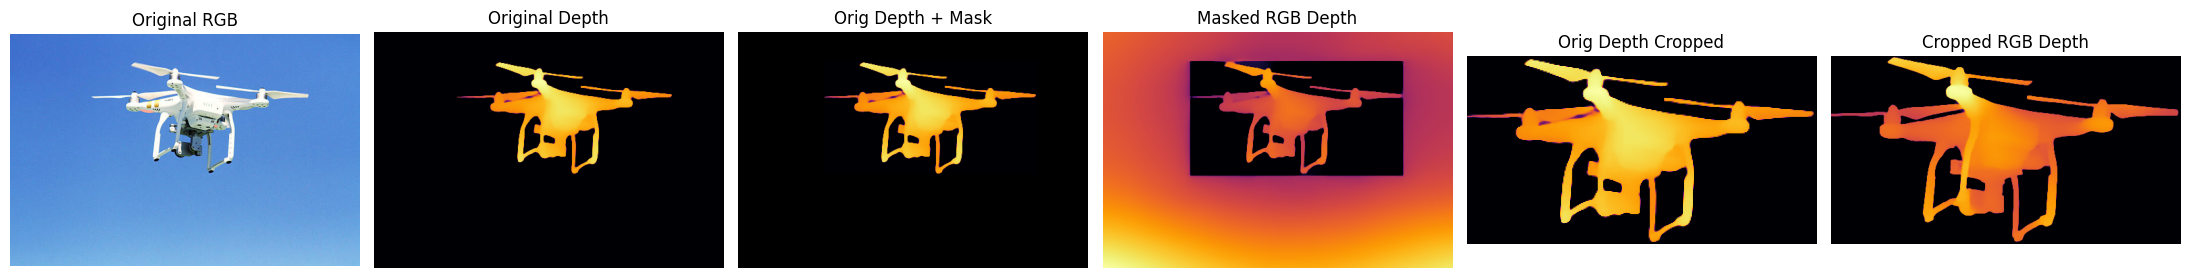

Showing strip for: clear_sky\drone2s.png


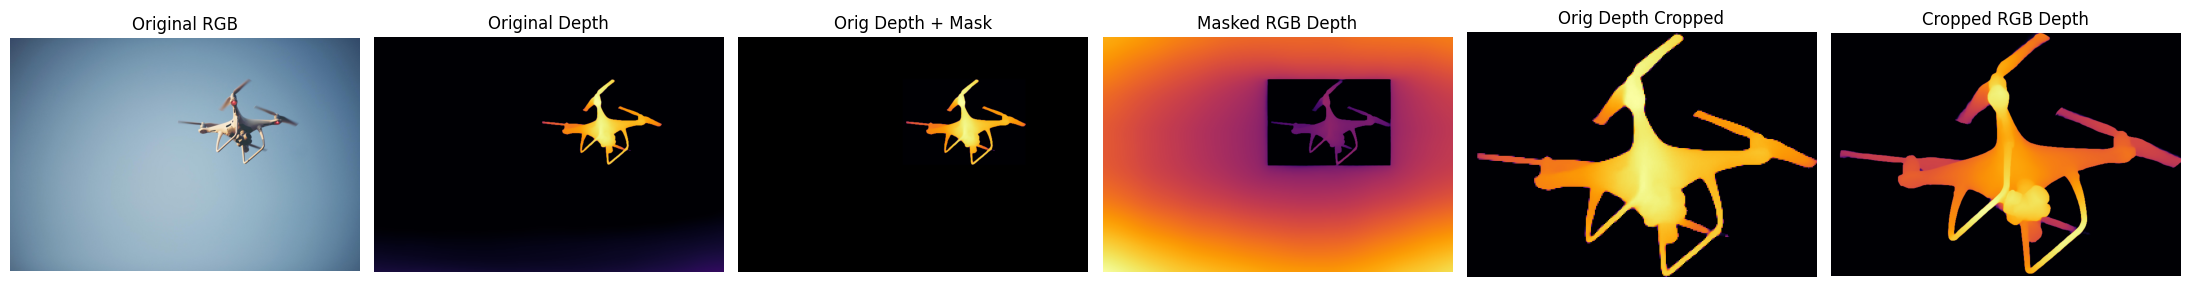

Showing strip for: clear_sky\drone3s.png


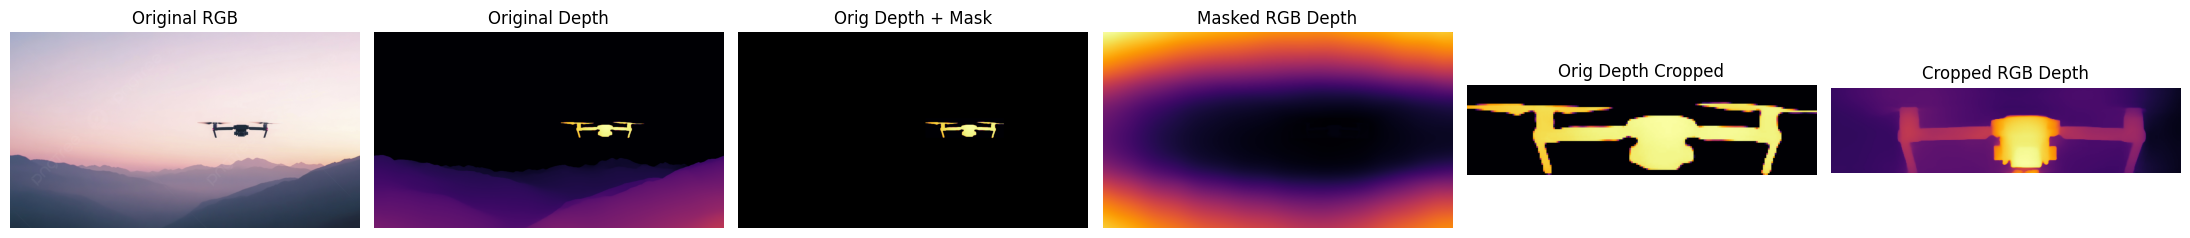

Showing strip for: clear_sky\drone4s.png


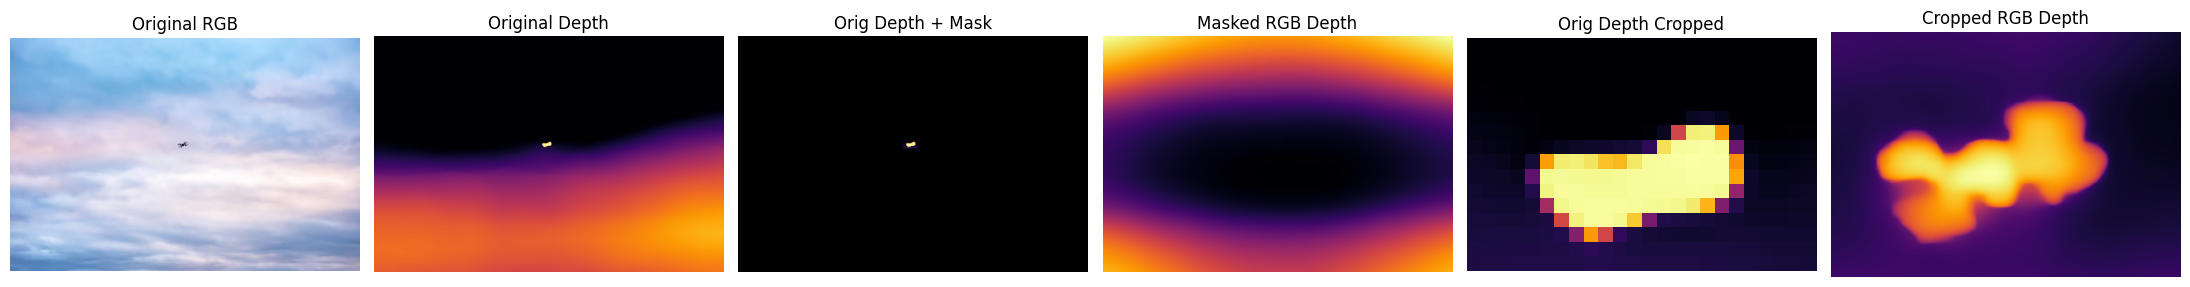

Showing strip for: clear_sky\drone5s.png


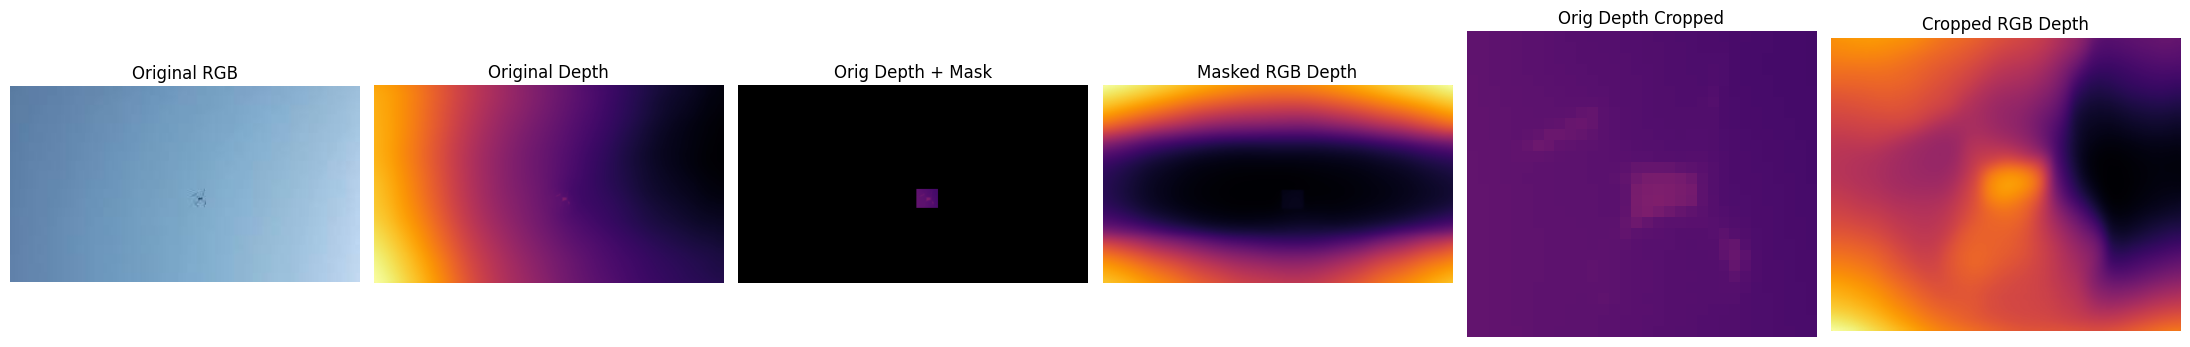

Showing strip for: real_buildings\image1.png


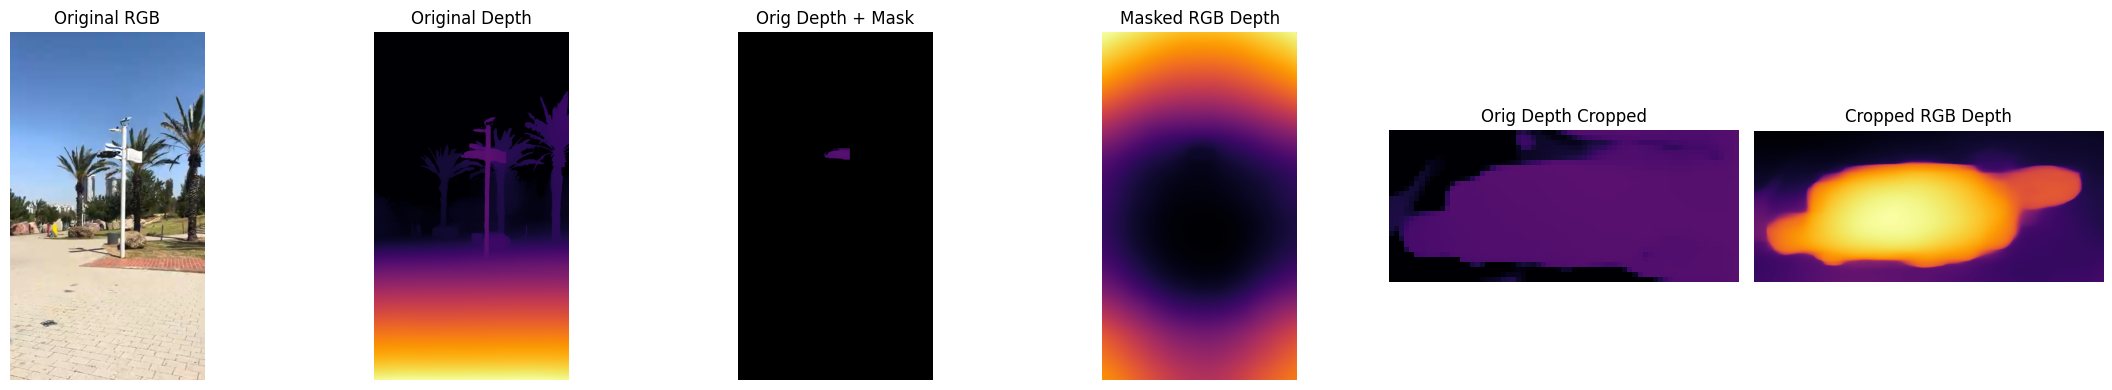

Showing strip for: real_buildings\image2.png


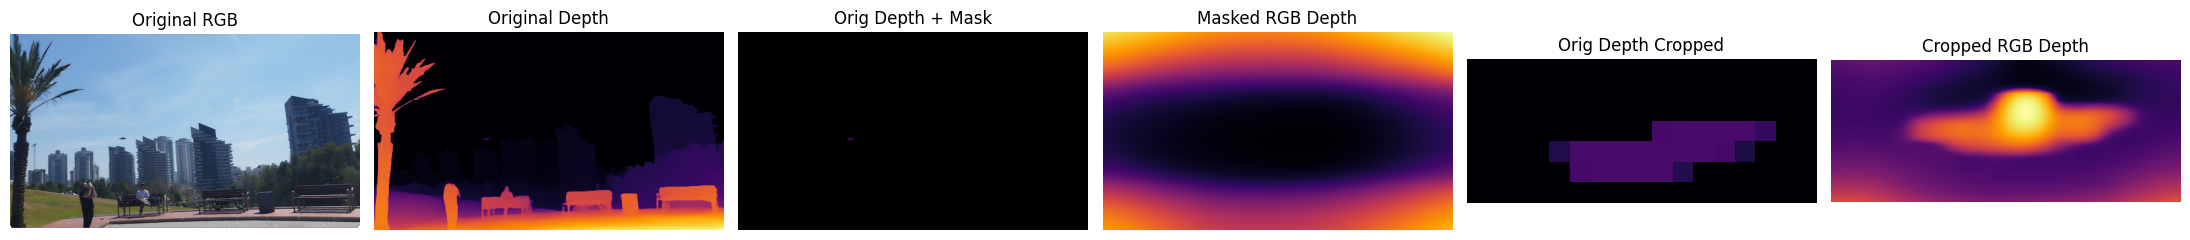

Showing strip for: real_buildings\image3.png


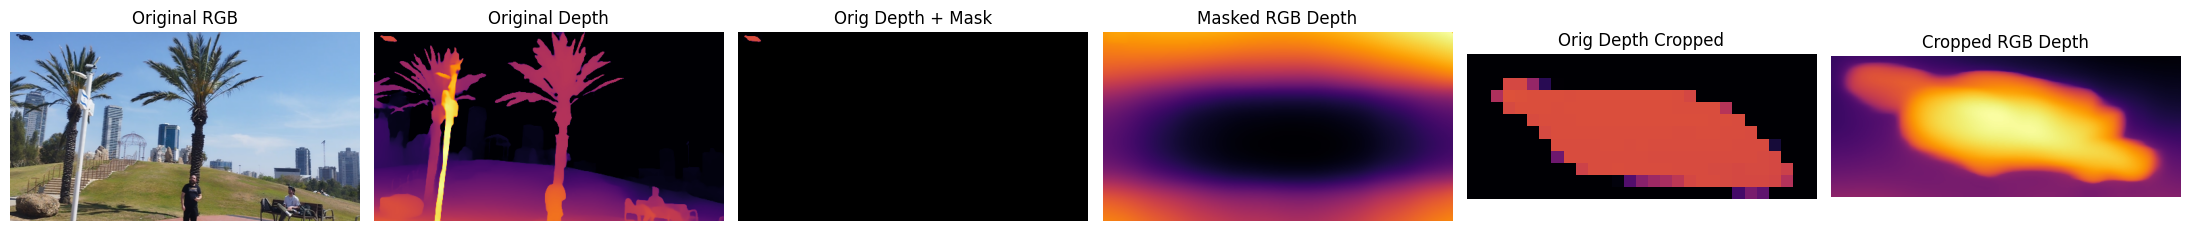

Showing strip for: real_buildings\image4.png


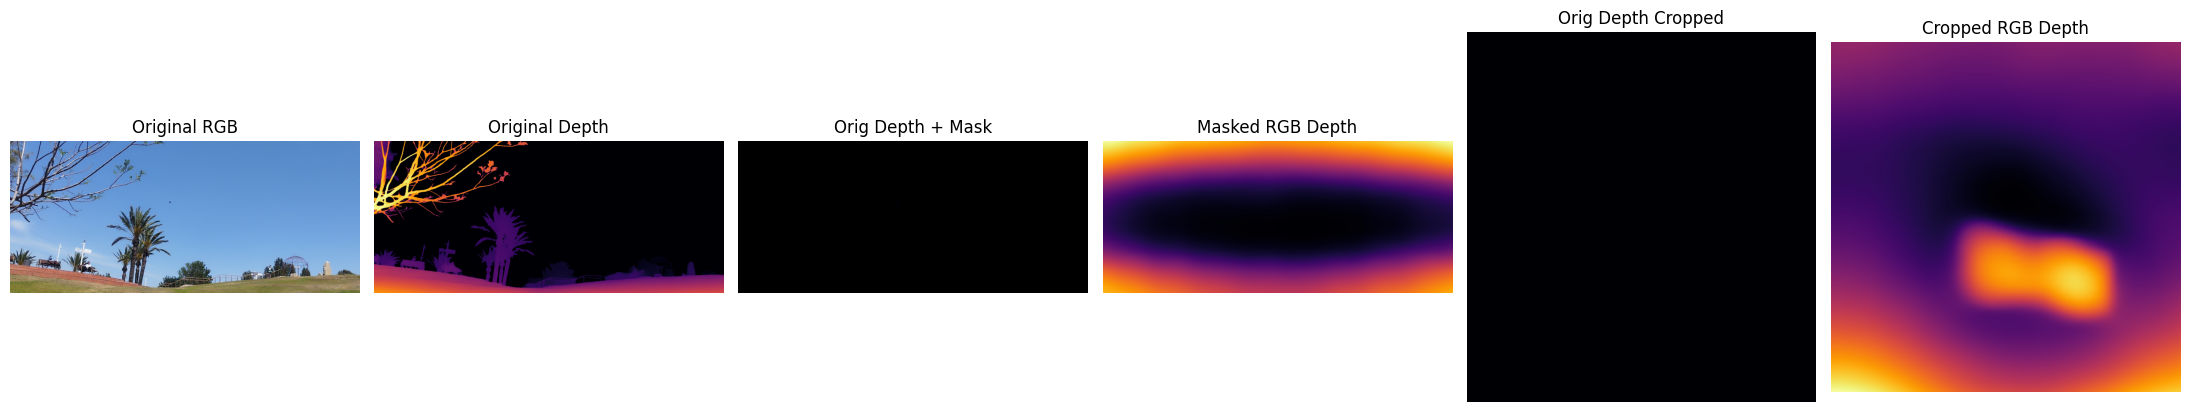

Showing strip for: real_buildings\image5.png


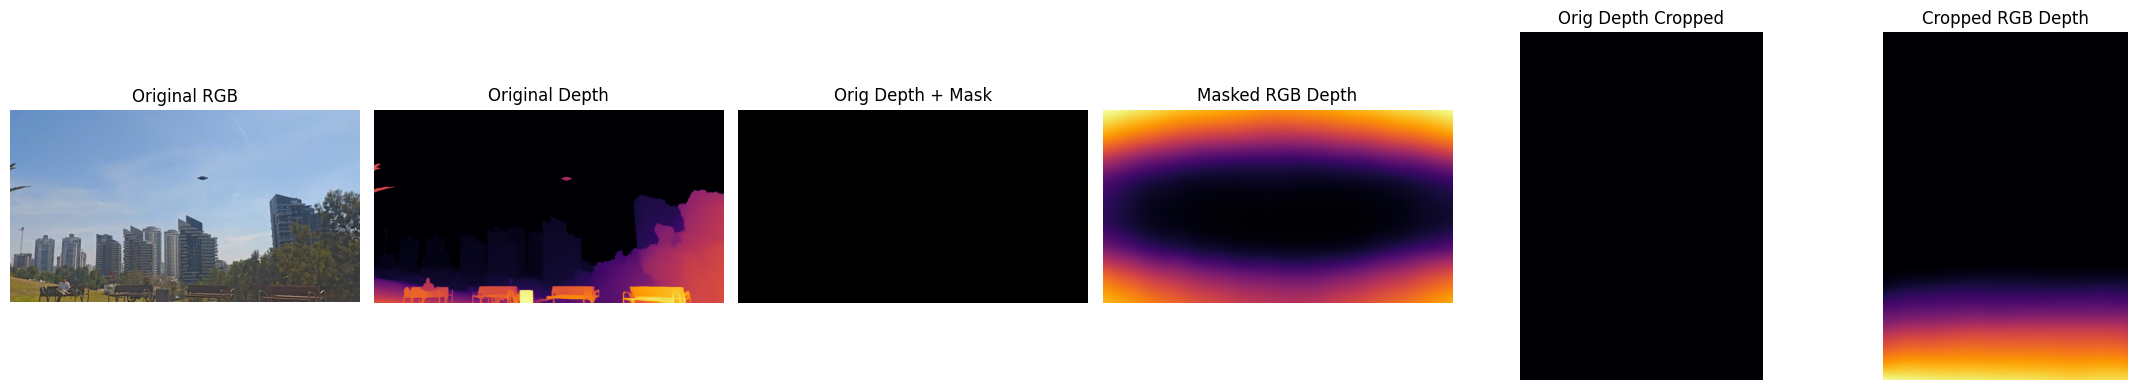

Showing strip for: real_buildings\image6.png


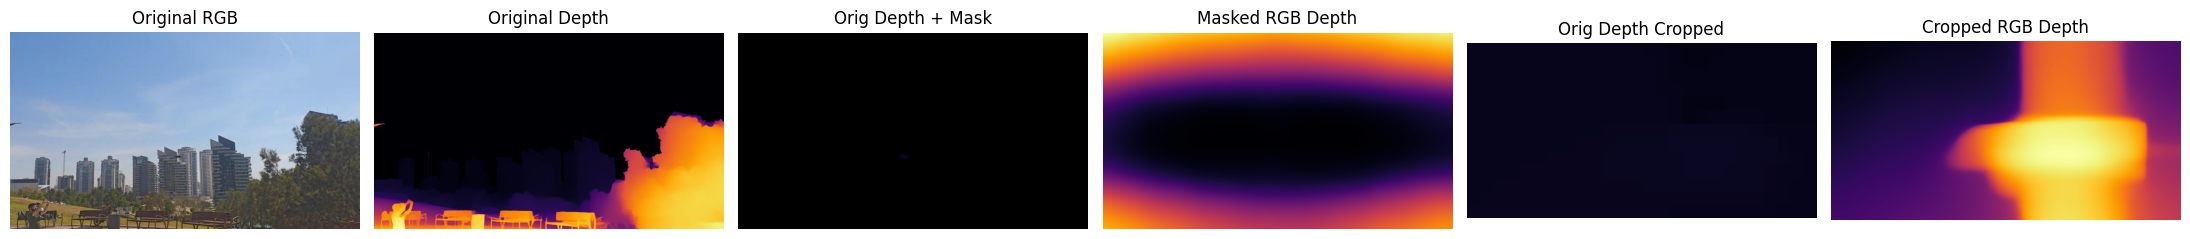

Showing strip for: synthetic_buildings\drone1.png


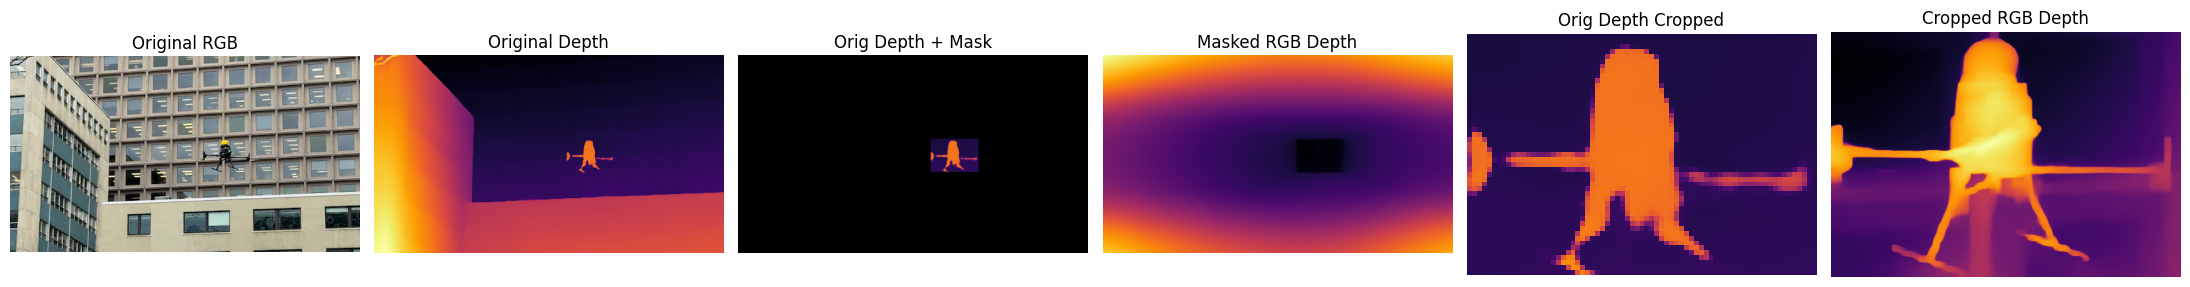

Showing strip for: synthetic_buildings\drone2.png


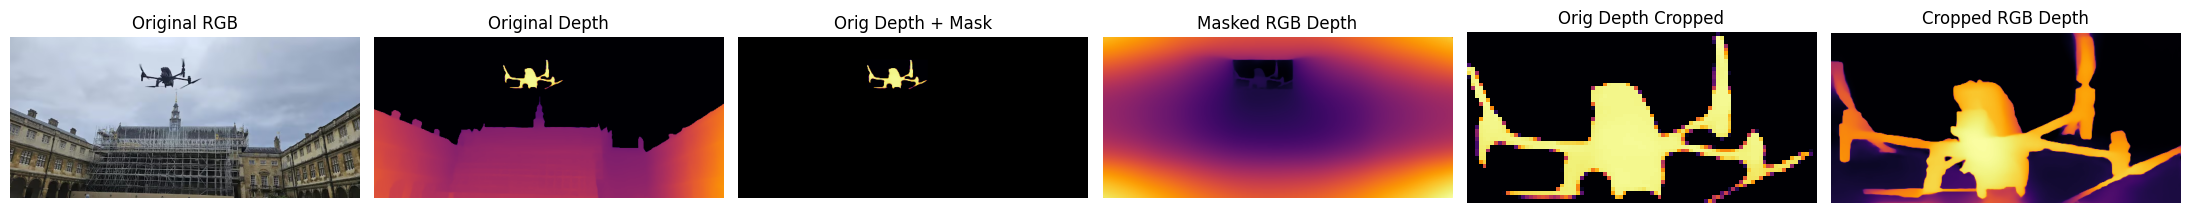

Showing strip for: synthetic_buildings\drone3.png


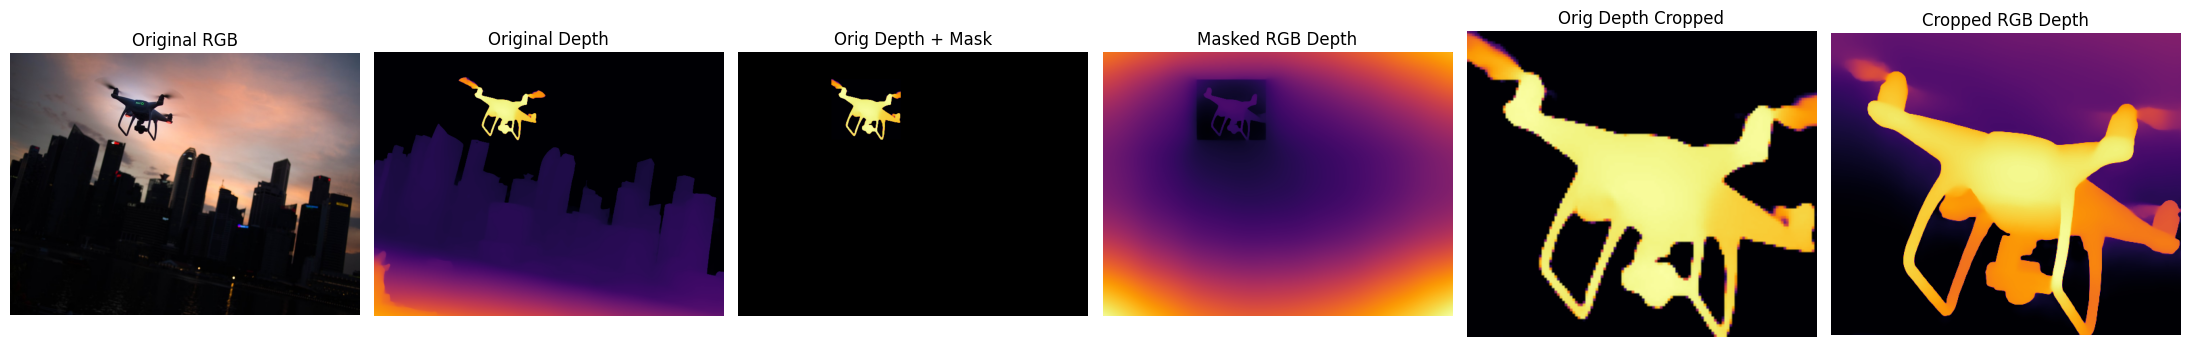

Showing strip for: synthetic_buildings\drone4.png


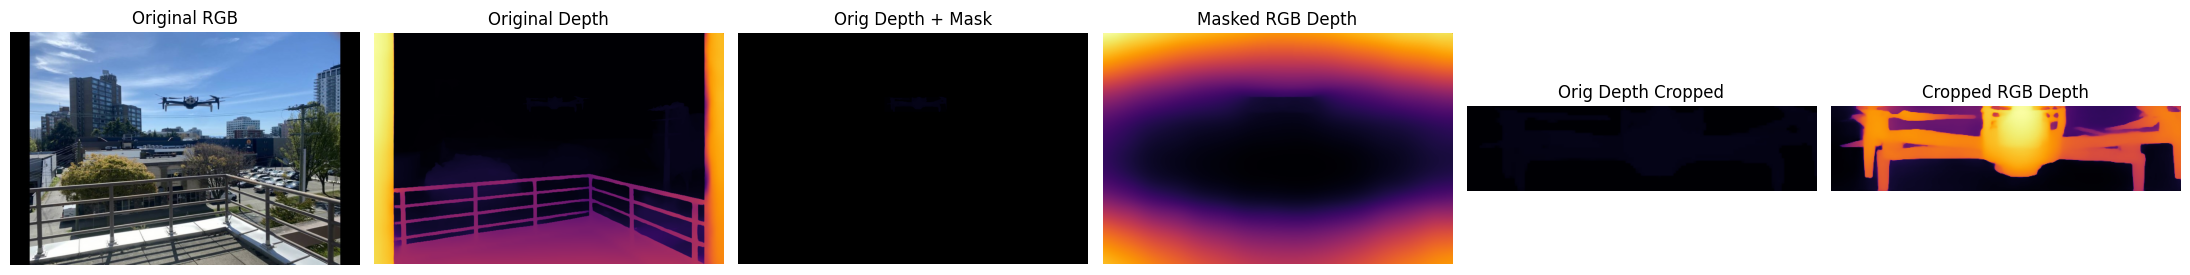

Showing strip for: synthetic_buildings\drone5.png


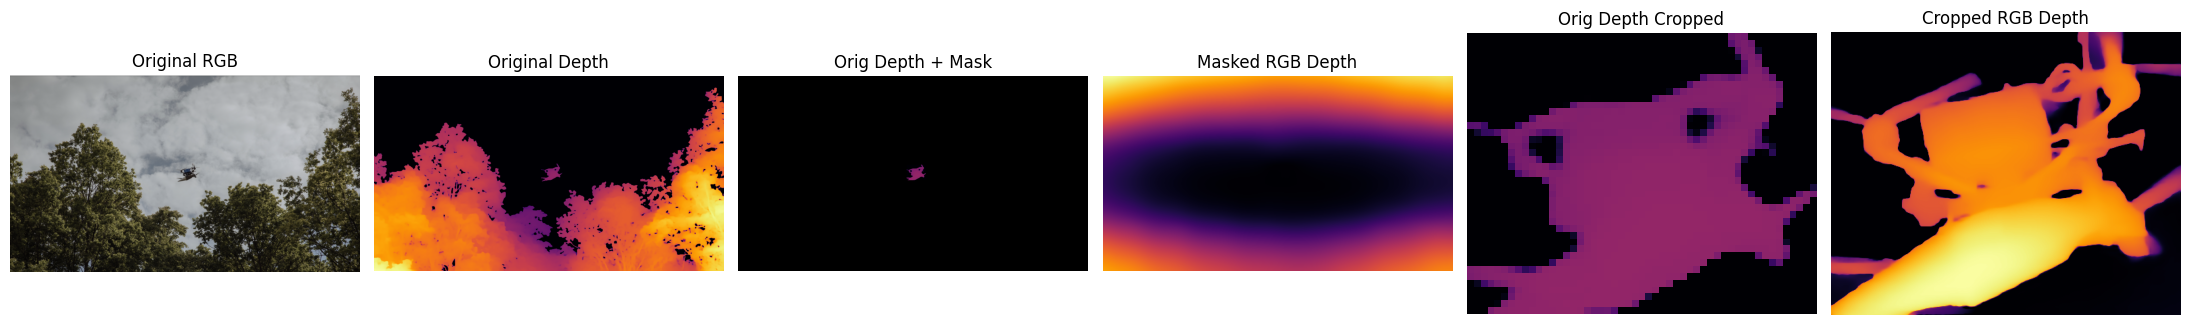

Showing strip for: synthetic_buildings\drone6.png


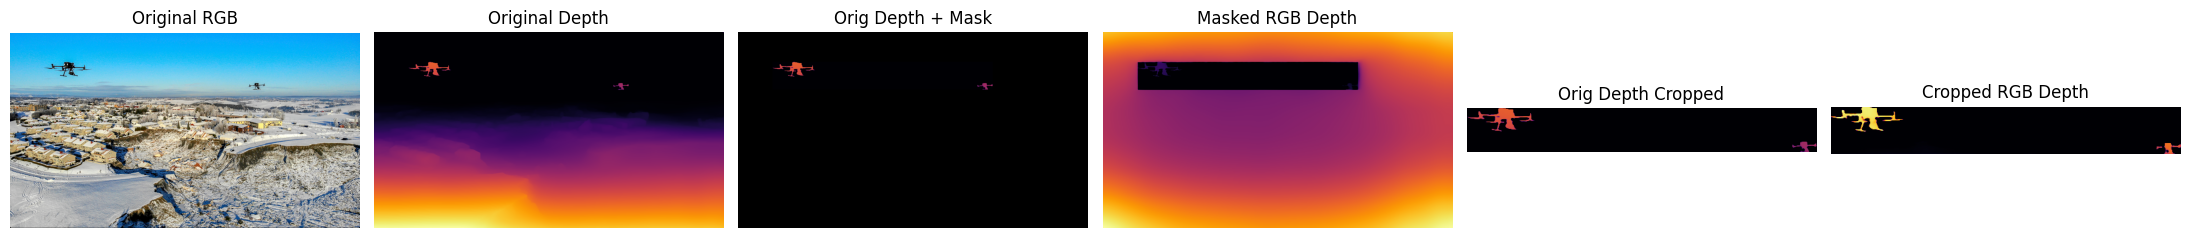

In [39]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# PATHS
# ==========================================================

BASE_IMAGES_DIR = "../data/images"
DEPTH_DIR = r"C:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\experiments\bb_on_drones_exp\output\depth_anything"

# ==========================================================
# BOUNDING BOX LIST (XYXY on RGB)
# ==========================================================

bboxes = [
    ("clear_sky\\drone1s.png", 152, 50, 525, 248),
    ("clear_sky\\drone2s.png", 1383, 350, 2415, 1070),
    ("clear_sky\\drone3s.png", 643, 295, 912, 364),
    ("clear_sky\\drone4s.png", 296, 180, 325, 200),
    ("clear_sky\\drone5s.png", 153, 89, 172, 105),
    ("real_buildings\\image1.png", 266, 360, 346, 395),
    ("real_buildings\\image2.png", 201, 195, 223, 204),
    ("real_buildings\\image3.png", 10, 5, 46, 20),
    ("real_buildings\\image4.png", 800, 300, 825, 325),
    ("real_buildings\\image5.png", 612, 216, 583, 257),
    ("real_buildings\\image6.png", 538, 405, 571, 422),
    ("synthetic_buildings\\drone1.png", 276, 120, 344, 167),
    ("synthetic_buildings\\drone2.png", 252, 44, 369, 102),
    ("synthetic_buildings\\drone3.png", 259, 75, 450, 241),
    ("synthetic_buildings\\drone4.png", 402, 177, 573, 219),
    ("synthetic_buildings\\drone5.png", 656, 351, 731, 412),
    ("synthetic_buildings\\drone6.png", 96, 82, 704, 159),
]

# ==========================================================
# HELPERS
# ==========================================================

def load_rgb(path):
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def load_depth(path):
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def map_bbox_rgb_to_depth(x1, y1, x2, y2, rgb_shape, depth_shape):
    h_rgb, w_rgb = rgb_shape[:2]
    h_d, w_d = depth_shape[:2]

    sx = w_d / w_rgb
    sy = h_d / h_rgb

    x1_d = int(x1 * sx)
    x2_d = int(x2 * sx)
    y1_d = int(y1 * sy)
    y2_d = int(y2 * sy)

    x1_d = max(0, min(w_d - 1, x1_d))
    x2_d = max(0, min(w_d, x2_d))
    y1_d = max(0, min(h_d - 1, y1_d))
    y2_d = max(0, min(h_d, y2_d))

    return x1_d, y1_d, x2_d, y2_d

def mask_image(img, x1, y1, x2, y2):
    out = np.zeros_like(img)
    out[y1:y2, x1:x2] = img[y1:y2, x1:x2]
    return out

# ==========================================================
# MAIN LOOP
# ==========================================================

for rel_path, x1, y1, x2, y2 in bboxes:
    print(f"Showing strip for: {rel_path}")

    # ---------- paths ----------
    rgb_path = os.path.join(BASE_IMAGES_DIR, rel_path)
    name = os.path.splitext(os.path.basename(rel_path))[0]

    depth_orig_path = os.path.join(DEPTH_DIR, f"{name}_DA.png")
    depth_masked_path = os.path.join(DEPTH_DIR, f"{name}_masked_DA.png")
    depth_cropped_path = os.path.join(DEPTH_DIR, f"{name}_cropped_DA.png")

    # ---------- load ----------
    rgb = load_rgb(rgb_path)
    depth_orig = load_depth(depth_orig_path)
    depth_masked_existing = load_depth(depth_masked_path)
    depth_cropped_existing = load_depth(depth_cropped_path)

    # ---------- clamp BB on RGB ----------
    h_rgb, w_rgb = rgb.shape[:2]
    x1, x2 = sorted([max(0, x1), min(w_rgb, x2)])
    y1, y2 = sorted([max(0, y1), min(h_rgb, y2)])

    # ---------- map BB to depth ----------
    x1_d, y1_d, x2_d, y2_d = map_bbox_rgb_to_depth(
        x1, y1, x2, y2,
        rgb.shape,
        depth_orig.shape
    )

    # ---------- derived ----------
    depth_orig_masked = mask_image(depth_orig, x1_d, y1_d, x2_d, y2_d)
    depth_orig_cropped = depth_orig[y1_d:y2_d, x1_d:x2_d]

    # ---------- plot ----------
    fig, axs = plt.subplots(1, 6, figsize=(22, 4))

    axs[0].imshow(rgb)
    axs[0].set_title("Original RGB")

    axs[1].imshow(depth_orig)
    axs[1].set_title("Original Depth")

    axs[2].imshow(depth_orig_masked)
    axs[2].set_title("Orig Depth + Mask")

    axs[3].imshow(depth_masked_existing)
    axs[3].set_title("Masked RGB Depth")

    axs[4].imshow(depth_orig_cropped)
    axs[4].set_title("Orig Depth Cropped")

    axs[5].imshow(depth_cropped_existing)
    axs[5].set_title("Cropped RGB Depth")

    for ax in axs:
        ax.axis("off")

    plt.tight_layout()
    plt.show()
